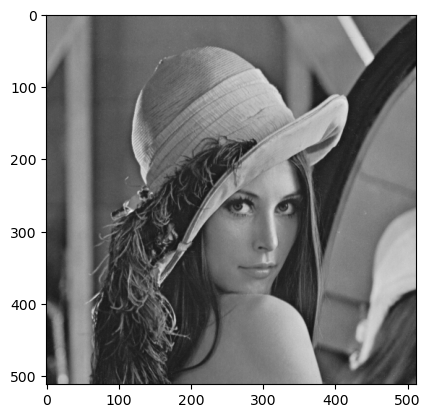

In [35]:
'''
    大津法
'''
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('image/lena.jpg')
# 转换成灰度图
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 查看原图
plt.imshow(img)

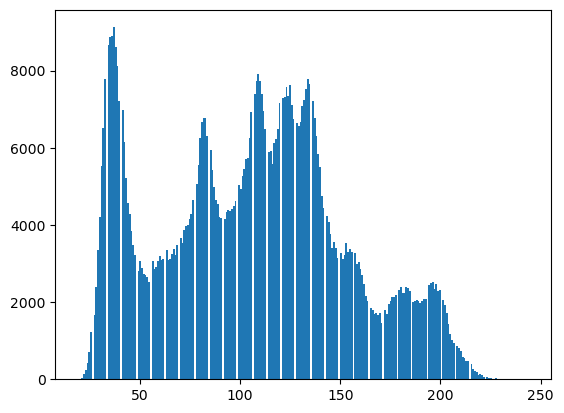

In [36]:
# 查看图片的灰度值直方图
plt.hist(img.ravel(), 256)
plt.show()

In [37]:
# 求类间方差
h = img.shape[0]
w = img.shape[1]
N = h*w
# 最大阈值
threshold = 0
max_g = 0

# 遍历每一个灰度值
for i in range(256):
    n0 = img[np.where(img < i)]
    n1 = img[np.where(img >= i)]
    w0 = len(n0) / N
    w1 = len(n1) / N
    u0 = np.mean(n0) if len(n0) > 0 else 0.
    u1 = np.mean(n1) if len(n1) > 0 else 0.
    
    g = w0 * w1 * (u0 - u1) ** 2
    if g > max_g:
        max_g = g
        threshold = i

# 查看类间最大阈值
print(threshold)

102


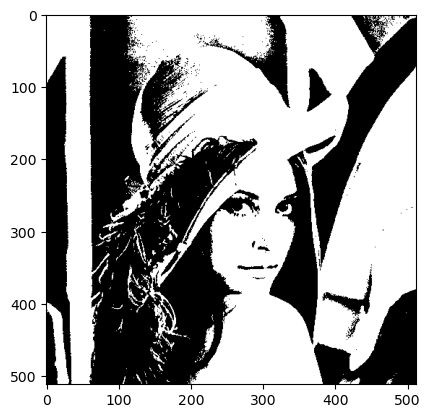

In [38]:
# 绘制图像
img[img < threshold] = 0
img[img >= threshold] = 255
plt.imshow(img, cmap="gray")

In [39]:
'''
    迭代法阈值分割
'''
# 求初始阈值
t0 = int((np.min(img)+np.max(img))/2)
print(t0)

127


In [40]:
img = plt.imread('image/lena.jpg')
img = np.array(img)
# 初始化
t1 = 0
res1 = 0
res2 = 0
s1 = 0
s2 = 0
# 迭代法求最佳阈值
while abs(t0 - t1)>0:
    for i in range(0, h-1):
        for j in range(0, w-1):
            if img[i, j] < t0:
                res1 = res1 + img[i, j]
                s1 = s1 + 1
            elif img[i, j] >= t0:
                res2 = res2 + img[i, j]
                s2 = s2 + 1
    avg1 = res1 / s1
    avg2 = res2 / s2
    res1 = 0
    res2 = 0
    s1 = 0
    s2 = 0
    # 旧阈值
    t1 = t0
    # 新阈值
    t0 = int((avg1 + avg2)/2)

# 查看新阈值
print(t0)



101


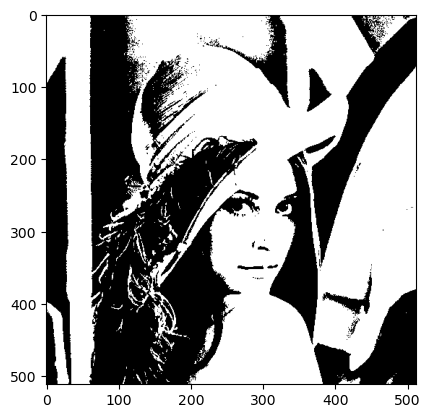

In [42]:
# 绘制图像
img[img < t0] = 0
img[img >= t0] = 255
plt.imshow(img, cmap='gray')